# **TD3 - Fiabilité des systèmes**
## **Système d’injection de sécurité d’un réacteur nucléaire**
### **Approche PSA niveau 1**
---


### **Partie 1. Description du système**

#### **1. Contexte général**

Dans un réacteur nucléaire à eau pressurisée (REP), le refroidissement du cœur est assuré en fonctionnement normal par le circuit primaire.
En situation accidentelle, notamment lors d’une perte de réfrigérant primaire (LOCA), des systèmes de sauvegarde doivent garantir l’évacuation de la puissance résiduelle afin d’éviter la dégradation du combustible.

Parmi ces systèmes figure le Système d’Injection de Sécurité (SIS), dont la fonction est d’injecter de l’eau borée dans le cœur lorsque la pression du circuit primaire chute brutalement.

Ce TD propose une modélisation probabiliste de la fiabilité du SIS, dans l’esprit d’une Analyse Probabiliste de Sûreté (PSA) niveau 1.

<hr style="border: none; height: 0.1px; background-color: #666666;">

#### **2. Description fonctionnelle du système étudié**

Le SIS considéré est composé des éléments suivants :

- Deux pompes d’injection (P1, P2)

    - Fonction : injecter de l’eau borée dans le cœur
    - Les pompes sont redondantes : une seule suffit pour assurer la fonction

- Une vanne d’isolement (V)

    - Fonction : autoriser l’écoulement de l’eau vers le cœur
    - Élément commun aux deux pompes

- Un capteur de pression (C)

    - Fonction : détecter la chute de pression du circuit primaire et déclencher l’injection
    - Élément unique

##### **Condition de succès du SIS**

Le système d’injection de sécurité est considéré comme fonctionnel si et seulement si :

- au moins une pompe fonctionne,
- la vanne est opérationnelle,
- le capteur fonctionne correctement.

<hr style="border: none; height: 0.1px; background-color: #666666;">

#### **3. Données de fiabilité et hypothèses**

Les taux de défaillance (ordres de grandeur réalistes) sont donnés ci-dessous :

| Composant | Symbole | Taux de défaillance λ (h⁻¹) |
| --------- | ------- | --------------------------- |
| Pompe     | P       | $(1,0 \times 10^{-4})$        |
| Vanne     | V       | $(5,0 \times 10^{-5})$        |
| Capteur   | C       | $(2,0 \times 10^{-5})$        |

Dans tout le TD, on adoptera les hypothèses suivantes :

- Les composants sont indépendants.
- Les durées de vie suivent une loi exponentielle (taux de défaillance constant).
- Il n’y a ni maintenance ni réparation pendant la mission.
- Les défaillances de cause commune sont négligées.
- Le système est sollicité uniquement en cas d’accident (logique de sauvegarde).



### **Partie 2. Analyse du système**

#### **1. Analyse fonctionnnelle et structurelle du système (RBD)**

1.1 Identifier les fonctions de sûreté assurées par le SIS.

1.2 Représenter le diagramme bloc de fiabilité (RBD) du système.

Identifier :
- les sous-systèmes en série,
- les sous-systèmes en parallèle.

1.3 Expliquer qualitativement l'intérêt de la redondance des pompes dans un contexte nucléaire.

1.4 Donner l'expression de la fiabilité globale $R_{SIS}(t)$ du système

1.5 Tracer l'évolution des fiabilités de chacun des composants et du système sur 40000 heures et sur 1000 heures

>**Réponses**

>Système étudié : SIS – Système d’injection de sécurité d’un réacteur nucléaire
>
><hr style="border: none; height: 0.1px; background-color: #666666;">
>
>**1.1 Identification des fonctions de sûreté assurées par le SIS**
>
>Le SIS (Safety Injection System) est un système de sauvegarde fondamental dont la fonction de sûreté globale est :\
>***"Assurer le refroidissement du cœur du réacteur en cas d’accident de perte de réfrigérant primaire (APRP - Accident de Perte de Réfrigérent Primaire / LOCA - Loss of Coolant Accident)"***
>
>Cette fonction globale se décline en plusieurs fonctions élémentaires de sûreté, hiérarchisées :
>
>🔹 **F1 – Détection de l’état accidentel**\
>Le système doit :
>- détecter une anomalie de pression ou de débit dans le circuit primaire,
>- identifier une situation nécessitant l’activation du SIS.\
>➡️ Assurée par :
>- capteurs de pression / niveau,
>- logique de décision de sûreté.
>
>🔹 **F2 – Décision et commande automatique**
>Le SIS doit :
>- comparer les mesures aux seuils de sûreté,
>- déclencher automatiquement l’injection sans intervention humaine.\
>➡️ Assurée par :
>- système de contrôle-commande de sûreté (I&C),
>- logique redondante et qualifiée.
>
>🔹 **F3 – Mise en mouvement du fluide de refroidissement**
>Le système doit :
>- fournir l’énergie hydraulique nécessaire à l’injection.\
>➡️ Assurée par :
>- pompes d’injection de sécurité.
>
>🔹 **F4 – Acheminement du fluide vers le cœur**\
>Le SIS doit :
>- permettre l’écoulement du fluide vers le circuit primaire.\
>➡️ Assurée par :
>- vannes d’isolement,
>- tuyauteries.
>
>🔹 **F5 – Injection effective dans le cœur**\
>Le système doit :
>- assurer un débit suffisant pour extraire la puissance résiduelle,
>- maintenir le cœur sous eau.
>
>📌 **Condition de réussite du SIS :** Toutes ces fonctions doivent être réalisées dans l’ordre et sans interruption.
>
>**1.2. Représentation du diagramme bloc de fiabilité (RBD)**
>
>Le RBD (Reliability Block Diagram) traduit la logique de réussite du système.
>
>Structure fonctionnelle simplifiée :
>
>Capteurs ---> [ Pompes ] ---> Vannes ---> Injection coeur
>
>Interprétation :
>- Capteurs, vanne : blocs en série
>- Pompes :blocs en parallèle
>
>**1.3 Identification des éléments en série et en parallèle**
>
>🔹 Éléments en série
>
>Les éléments suivants sont en série, car la défaillance d’un seul entraîne l’échec du SIS :
>
>- Capteurs	Sans détection : pas de déclenchement
>- Logique de commande	: Sans décision → pas d’injection
>- Vannes : Sans ouverture → fluide bloqué
>- Ligne d’injection : Rupture → perte de fonction
>
>🔹 Éléments en parallèle : pompes d’injection
>
>Les pompes sont montées en redondance, typiquement 1 sur 2 ou 2 sur 3.
>
>La redondance est une exigence de sûreté fondamentale.
>
>🔹 a) Réduction drastique de la probabilité de défaillance
>
>👉 Pour des systèmes à très haute fiabilité, le gain est exponentiel.
>
>🔹 b) Tolérance aux défaillances simples
>
>Principe nucléaire fondamental :
>
>Aucune défaillance unique ne doit conduire à un accident grave.
>
>➡️ Si une pompe tombe en panne :
>
>la fonction de sûreté est maintenue.
>
>🔹 c) Prise en compte de l’indisponibilité en maintenance
>
>Une pompe peut être :
>
>en maintenance, indisponible au démarrage, sans remettre en cause la sûreté.
>
>➡️ Disponibilité accrue du système.
>
>🔹 d) Robustesse face aux agressions externes
>
>séisme, perte d’alimentation, défaut matériel.
>
>➡️ Les pompes sont :
>- physiquement séparées,
>- alimentées par des sources électriques distinctes.
>
>🔹 e) Conformité aux exigences réglementaires
>
>normes IAEA, exigences ASN, conception “defence in depth”.
>
>**Conclusion :**
>
>Le SIS est un système de sûreté dont la réussite repose sur une chaîne fonctionnelle en série, renforcée par une redondance ciblée des >composants critiques, notamment les pompes, dont la défaillance aurait des conséquences immédiates sur le refroidissement du cœur.
>
>**1.4 La fiabilité du système est :**
>
>$R_{SIS}(t)=R_V(t) R_C(t)\left[1−(1−R_P(t))^2\right]$
>
>**Commentaire sur les données (taux de défaillance) :**
>
>- Le capteur est le plus fiable individuellement,
>- la pompe est le composant le plus fragile, mais la criticité système ne dépend pas uniquement du $\lambda$
>
>👉 En sûreté, la position dans l’architecture est aussi importante que la fiabilité individuelle.
>

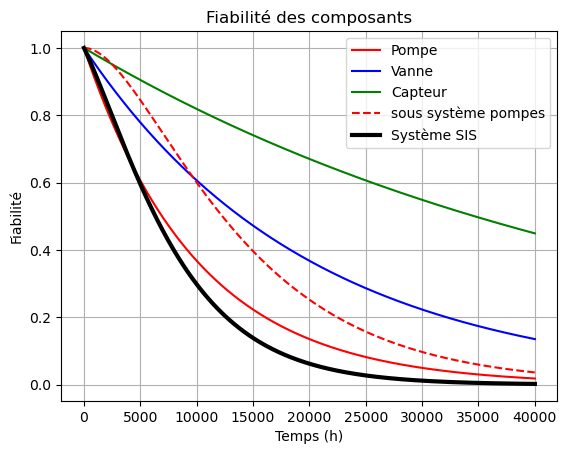

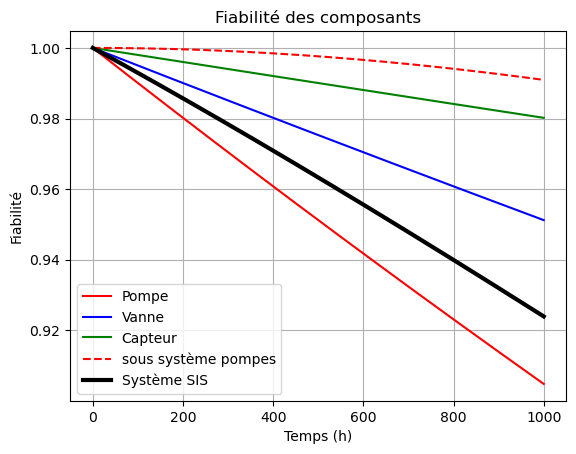

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# DONNÉES DU PROBLÈME
# ============================================================

# Taux de défaillance (h^-1)
lambda_p = 1e-4   # Pompe
lambda_v = 5e-5   # Vanne
lambda_c = 2e-5   # Capteur

# Temps d’étude (heures)
t = np.linspace(0, 40000, 500000)
t1 = np.linspace(0, 1000, 500000)

# ============================================================
# FONCTIONS DE FIABILITÉ DES COMPOSANTS
# ============================================================

def R_exp(t, lamb):
    """Fiabilité loi exponentielle"""
    return np.exp(-lamb * t)

R_p = R_exp(t, lambda_p)
R_v = R_exp(t, lambda_v)
R_c = R_exp(t, lambda_c)

R_p1 = R_exp(t1, lambda_p)
R_v1 = R_exp(t1, lambda_v)
R_c1 = R_exp(t1, lambda_c)

# ============================================================
# FIABILITÉ ANALYTIQUE DU SYSTÈME
# ============================================================

# Pompes en parallèle (2)
R_pumps = 1 - (1 - R_p)**2
R_pumps1 = 1 - (1 - R_p1)**2

# Système en série : pompes + vanne + capteur
R_sys = R_pumps * R_v * R_c
R_sys1 = R_pumps1 * R_v1 * R_c1

# ============================================================
# TRACÉS DES FIABILITÉS
# ============================================================

plt.figure()
plt.plot(t, R_p, color="red" ,label="Pompe")
plt.plot(t, R_v, color="blue", label="Vanne")
plt.plot(t, R_c, color="green", label="Capteur")
plt.plot(t, R_pumps, color="red", linestyle="--", label="sous système pompes")
plt.plot(t, R_sys, color="black", label="Système SIS", linewidth=3)
plt.xlabel("Temps (h)")
plt.ylabel("Fiabilité")
plt.title("Fiabilité des composants")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t1, R_p1, color="red" ,label="Pompe")
plt.plot(t1, R_v1, color="blue", label="Vanne")
plt.plot(t1, R_c1, color="green", label="Capteur")
plt.plot(t1, R_pumps1, color="red", linestyle="--", label="sous système pompes")
plt.plot(t1, R_sys1, color="black", label="Système SIS", linewidth=3)
plt.xlabel("Temps (h)")
plt.ylabel("Fiabilité")
plt.title("Fiabilité des composants")
plt.legend()
plt.grid(True)
plt.show()

>**Analyse de la fiabilité analytique du système**
>
>Forme de la courbe
>
>La fiabilité du système :
>
>- décroît monotoniquement,
>- plus rapidement que celle des composants isolés,
>- mais moins vite qu’un système purement en série, grâce à la redondance des pompes.
>
>Interprétation physique
>
>À court terme :
>
>- le système est très fiable (probabilité proche de 1),
>
>à long terme :
>
>- la fiabilité tend vers 0 (comportement inévitable).
>
>➡️ En nucléaire, on raisonne rarement à long terme, mais sur des temps de mission bien définis.

#### **2. Analyse des Données de fiabilité**

2.1 Calculer le MTTF de chaque composant et du système\
2.2 Classer les composants par criticité\
2.3 Discuter la fiabilité du système et identifier le maillon faible du système

> **Réponse**

>**Le SIS est modélisé par :**
>
>$R_{SIS}(t)=R_V(t) R_C(t)\left[1−(1−R_P(t))^2\right]$
>
>$R_{SIS}(t)=e^{-(\lambda_v+\lambda_c)t}\left[1-\left(1-e^{-\lambda p t}\right)^2\right]$
>
>$1-\left(1-e^{-\lambda p t}\right)^2=1-\left(1-2e^{-\lambda_p t} + e^{-2\lambda_p t}\right)=2e^{-\lambda_p t}-e^{-2\lambda_p t}$
>
>$R_{SIS}(t)=e^{-(\lambda_v+\lambda_c)t}\left(2e^{-\lambda_p t} - e^{-2\lambda_p t}\right)$
>
>$R_{SIS}(t)=2e^{-\left(\lambda_v+\lambda_c+\lambda_p\right)t}-e^{-\left(\lambda_v+\lambda_c+2\lambda_p\right)t}$
>
>$MTTF_{SIS}=\int_0^{+\infty} R_{SIS}(t)dt$
>
>$MTTF_{SIS}=\frac{2}{\lambda_v+\lambda_c+\lambda_p}-\frac{1}{\lambda_v+\lambda_c + 2\lambda_p}$


In [2]:
# ============================================================
# MTTF ANALYTIQUES
# ============================================================

MTTF_p = 1 / lambda_p
MTTF_v = 1 / lambda_v
MTTF_c = 1 / lambda_c
MTTF_SIS = 2 / (lambda_v+lambda_c+lambda_p)-1 / (lambda_v+lambda_c+2*lambda_p)

print("MTTF composants (heures)")
print(f"Pompe   : {MTTF_p:.1f}")
print(f"Vanne   : {MTTF_v:.1f}")
print(f"Capteur : {MTTF_c:.1f}")
print(f"SIS     : {MTTF_SIS:.1f}")

MTTF composants (heures)
Pompe   : 10000.0
Vanne   : 20000.0
Capteur : 50000.0
SIS     : 8061.0


#### 3. Calcul analytique de la fiabilité

Écrire la fiabilité du système en fonction du temps.

Calculer la probabilité que le système fonctionne pendant 24 h, 72 h, 7 jours.


In [3]:
# ============================================================
# PROBABILITÉ DE FONCTIONNEMENT SUR UNE MISSION
# ============================================================

def R_system(t):
    R_p = np.exp(-lambda_p * t)
    R_v = np.exp(-lambda_v * t)
    R_c = np.exp(-lambda_c * t)
    R_pumps = 1 - (1 - R_p)**2
    return R_pumps * R_v * R_c

missions = [24, 72, 168]  # heures

print("\nFiabilité du SIS sur mission")
for tm in missions:
    print(f"R({tm} h) = {R_system(tm):.6f}")


Fiabilité du SIS sur mission
R(24 h) = 0.998316
R(72 h) = 0.994921
R(168 h) = 0.988035


>**Réponse**
>
>La fiabilité sur mission permet d’évaluer la probabilité qu’un système de sûreté assure sa fonction pendant la durée requise par un scénario >accidentel. En sûreté nucléaire, cette approche est essentielle car les systèmes sont dimensionnés pour des missions temporelles finies et non >pour un fonctionnement illimité.
>
>Dans le cas d'un SIS, on s'interesse à sa fiabilité uniquement en fonctionnement. Sa fiabilité en mode "stand-by" est calculé par d'autres modèles. Comme on s'intéresse à des durées de misssions très courtes, la loi exponentielle se justifie (pas ou peu de vieillissement).

#### 4. Simulation Monte Carlo (analyse probabiliste de sûreté)

Pour des systèmes complexes, il peut être compliqué d'établir la fiabilité du système d'un point de vue analytique.\
La fiabilité du système est donc simulée avec des méthodes de Monte Carlo.

**Principe**\
On simule les durées de vie des composants et on détermine si le système est opérationnel à l'aide de critères de succès.

4.1 Simuler "aléatoirement" les durées de vie de chaque composant à l'aide d'une loi exponentielle en utilisant leur taux de défaillance respectifs. On simulera 200000 expériences aléatoires.

4.2 Tracer les histogrammes des durées de vie de chacun des composants ainsi que celui du système (SIS)

4.3 Calculer le MTTF (Monte Carlo) et comparé à celui obtenu analytiquement.

4.4 Tracer la courbe de densité de probabilité analytique sur l'histogramme de la durée de vie du système. Qu'observe t-on ?

4.5 Calculer la probabilité d'échec sur une mission de 72 heures. Comparer avec la valeur analytique.

4.6 Calculer la probabilité d'échec sur une mission de 72 heures si on ajoute une troisième pompe.


MTTF système (simulation Monte Carlo)
MTTF SIS = 8061.7 h


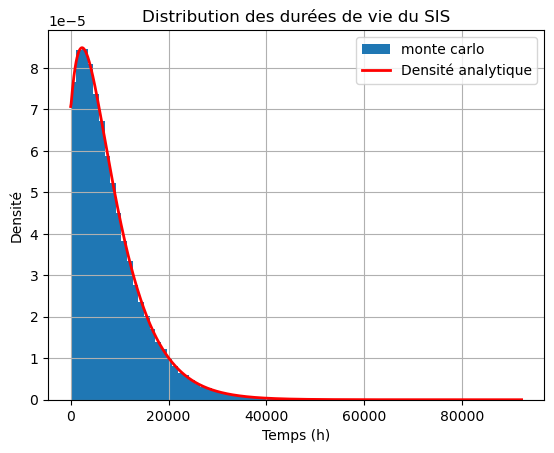


Probabilité d’échec sur 72 h
Monte Carlo : 5.080000e-03
Analytique  : 5.078530e-03

Impact de la redondance (3 pompes)
P_fail (2 pompes) = 5.080000e-03
P_fail (3 pompes) = 5.020000e-03


In [4]:
# ============================================================
# SIMULATION MONTE CARLO
# ============================================================

N = 200000

# Durées de vie simulées
T_P1 = np.random.exponential(scale=1/lambda_p, size=N)
T_P2 = np.random.exponential(scale=1/lambda_p, size=N)
T_V  = np.random.exponential(scale=1/lambda_v, size=N)
T_C  = np.random.exponential(scale=1/lambda_c, size=N)

# Durée de vie du sous-système pompes (parallèle)
T_pumps = np.maximum(T_P1, T_P2)

# Durée de vie du système
T_sys_MC = np.minimum.reduce([T_pumps, T_V, T_C])

# ============================================================
# MTTF SYSTÈME (SIMULATION)
# ============================================================

print("\nMTTF système (simulation Monte Carlo)")
print(f"MTTF SIS = {T_sys_MC.mean():.1f} h")

# ============================================================
# 9. HISTOGRAMME DES DURÉES DE VIE (SIMULATION)
# ============================================================

t = np.linspace(0, T_sys_MC.max(), 1000)

f_sys = -np.gradient(R_system(t), t)

plt.figure()
plt.hist(T_sys_MC, bins=80, density=True, label="monte carlo")
plt.plot(t, f_sys, 'r', lw=2, label="Densité analytique")
plt.xlabel("Temps (h)")
plt.ylabel("Densité")
plt.title("Distribution des durées de vie du SIS")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# PROBABILITÉ D’ÉCHEC SUR UNE MISSION (SIMULATION)
# ============================================================

mission_time = 72  # heures

P_fail_MC = np.mean(T_sys_MC < mission_time)
P_fail_analytical = 1 - R_system(mission_time)

print("\nProbabilité d’échec sur 72 h")
print(f"Monte Carlo : {P_fail_MC:.6e}")
print(f"Analytique  : {P_fail_analytical:.6e}")

# ============================================================
# ÉTUDE DE REDONDANCE : 3 POMPES (SIMULATION)
# ============================================================

T_P3 = np.random.exponential(scale=1/lambda_p, size=N)

T_pumps_3 = np.maximum.reduce([T_P1, T_P2, T_P3])
T_sys_3p = np.minimum.reduce([T_pumps_3, T_V, T_C])

P_fail_3p = np.mean(T_sys_3p < mission_time)

print("\nImpact de la redondance (3 pompes)")
print(f"P_fail (2 pompes) = {P_fail_MC:.6e}")
print(f"P_fail (3 pompes) = {P_fail_3p:.6e}")



Indice Birnbaum (sensibilité) :
  Pompe1: 0.02263
  Pompe2: 0.02263
   Vanne: 0.03006
 Capteur: 0.01202

Fussell-Vesely (contribution au risque) :
  Pompe1: 0.91760
  Pompe2: 0.91760
   Vanne: 0.86055
 Capteur: 0.59570


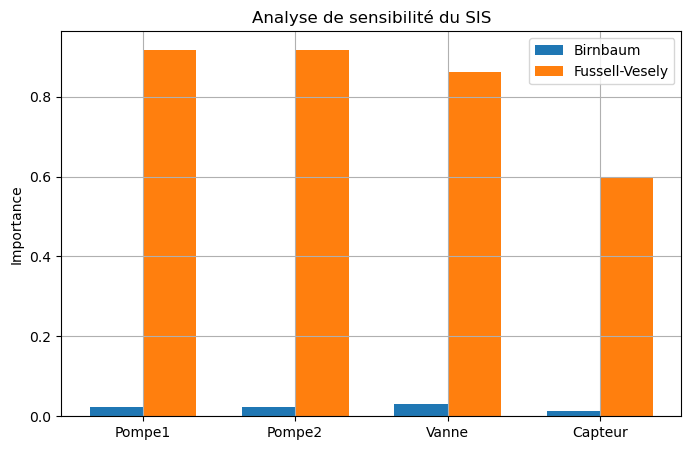

In [5]:
# --- Composants ---
components = ['Pompe1', 'Pompe2', 'Vanne', 'Capteur']

# Fiabilité individuelle analytique (exponentielle)
R_P1 = np.exp(-lambda_p * t)
R_P2 = np.exp(-lambda_p * t)
R_V  = np.exp(-lambda_v * t)
R_C  = np.exp(-lambda_c * t)

# Fiabilité système analytique (Série des chemins de succès avec Pompes en parallèle)
R_pumps = 1 - (1 - R_P1)*(1 - R_P2)  # parallèle
R_sys = R_pumps * R_V * R_C          # série

# -----------------------------
# 1️⃣ Birnbaum (approche dérivée numérique)
# -----------------------------
epsilon = 1e-6
B = {}

# Fonction de calcul de R_sys pour un composant modifié
def R_sys_mod(lambda_mod):
    R_P1_mod = np.exp(-lambda_mod['Pompe1'] * t)
    R_P2_mod = np.exp(-lambda_mod['Pompe2'] * t)
    R_V_mod  = np.exp(-lambda_mod['Vanne'] * t)
    R_C_mod  = np.exp(-lambda_mod['Capteur'] * t)
    R_pumps_mod = 1 - (1 - R_P1_mod)*(1 - R_P2_mod)
    return R_pumps_mod * R_V_mod * R_C_mod

# Calcul Birnbaum pour chaque composant
lambdas_dict = {'Pompe1': lambda_p, 'Pompe2': lambda_p, 'Vanne': lambda_v, 'Capteur': lambda_c}

for comp in components:
    lambdas_mod = lambdas_dict.copy()
    lambdas_mod[comp] *= (1 - epsilon)  # amélioration infinitésimale
    R_mod = R_sys_mod(lambdas_mod)
    # Birnbaum = variation du R_sys moyen
    B[comp] = np.mean(R_mod - R_sys) / epsilon

# -----------------------------
# 2️⃣ Fussell-Vesely (approche MCS)
# -----------------------------
# Minimal cut sets (simplifié pour notre SIS)
MCS = [
    ['Capteur'],         # défaillance capteur
    ['Vanne'],           # défaillance vanne
    ['Pompe1', 'Pompe2'] # défaillance simultanée des 2 pompes
]

FV = {}
P_MCS = {}
P_TOP = 1 - np.mean(R_sys)

for comp in components:
    P_comp = 0
    for mcs in MCS:
        if comp in mcs:
            # Probabilité MCS analytique
            if len(mcs) == 1:
                if mcs[0] == 'Capteur':
                    P = 1 - np.mean(R_C)
                elif mcs[0] == 'Vanne':
                    P = 1 - np.mean(R_V)
            else:  # Pompes en parallèle
                P = np.mean((1 - R_P1)*(1 - R_P2))
            P_comp += P
    FV[comp] = P_comp / P_TOP

# -----------------------------
# 3️⃣ Affichage
# -----------------------------
print("Indice Birnbaum (sensibilité) :")
for c in components:
    print(f"{c:>8}: {B[c]:.5f}")

print("\nFussell-Vesely (contribution au risque) :")
for c in components:
    print(f"{c:>8}: {FV[c]:.5f}")

# Graphique comparatif
fig, ax = plt.subplots(figsize=(8,5))
width = 0.35
ind = np.arange(len(components))
ax.bar(ind - width/2, [B[c] for c in components], width, label='Birnbaum')
ax.bar(ind + width/2, [FV[c] for c in components], width, label='Fussell-Vesely')
ax.set_xticks(ind)
ax.set_xticklabels(components)
ax.set_ylabel('Importance')
ax.set_title('Analyse de sensibilité du SIS')
ax.legend()
plt.grid(True)
plt.show()

